In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [2]:
df = pd.read_csv("hprice.csv")

In [3]:
df

,Area (sq ft),Bedrooms,Age (years),Price ($)
0,2600,3.0,20,"550,000"
1,3000,4.0,15,"565,000"
2,3200,NaN,18,"610,000"
3,3600,3.0,30,"595,000"
4,4000,5.0,8,"760,000"
...,...,...,...,...
94,13300,6.0,8,"760,000"
95,13400,5.0,8,"810,000"
96,13500,4.0,10,"850,000"
97,13600,3.0,5,"900,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area (sq ft)  99 non-null     int64  
 1   Bedrooms      98 non-null     float64
 2   Age (years)   99 non-null     int64  
 3   Price ($)     99 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [5]:
df.corr()

ValueError: could not convert string to float: '550,000'

In [6]:
df.describe()

,Area (sq ft),Bedrooms,Age (years)
count,99.000000,98.000000,99.000000
mean,8751.515152,4.683673,11.808081
std,2958.017939,1.264886,8.610242
min,2600.000000,3.000000,1.000000
25%,6350.000000,4.000000,5.000000
50%,8800.000000,4.500000,10.000000
75%,11250.000000,6.000000,18.000000
max,13700.000000,7.000000,30.000000


In [7]:
df['Price'] = df['Price ($)'].astype(float)

ValueError: could not convert string to float: '550,000'

In [8]:
df['price'] = df['Price ($)'].str.replace(',', '').astype(float)

In [9]:
df['price']

0      550000.0
1      565000.0
2      610000.0
3      595000.0
4      760000.0
        ...    
94     760000.0
95     810000.0
96     850000.0
97     900000.0
98    1000000.0
Name: price, Length: 99, dtype: float64

In [10]:
df

,Area (sq ft),Bedrooms,Age (years),Price ($),price
0,2600,3.0,20,"550,000",550000.0
1,3000,4.0,15,"565,000",565000.0
2,3200,NaN,18,"610,000",610000.0
3,3600,3.0,30,"595,000",595000.0
4,4000,5.0,8,"760,000",760000.0
...,...,...,...,...,...
94,13300,6.0,8,"760,000",760000.0
95,13400,5.0,8,"810,000",810000.0
96,13500,4.0,10,"850,000",850000.0
97,13600,3.0,5,"900,000",900000.0


In [11]:
df.Bedrooms = df.Bedrooms.fillna(df.Bedrooms.median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area (sq ft)  99 non-null     int64  
 1   Bedrooms      99 non-null     float64
 2   Age (years)   99 non-null     int64  
 3   Price ($)     99 non-null     object 
 4   price         99 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [13]:
abc= df.drop(columns=['Price ($)'])

In [14]:
abc

,Area (sq ft),Bedrooms,Age (years),price
0,2600,3.0,20,550000.0
1,3000,4.0,15,565000.0
2,3200,4.5,18,610000.0
3,3600,3.0,30,595000.0
4,4000,5.0,8,760000.0
...,...,...,...,...
94,13300,6.0,8,760000.0
95,13400,5.0,8,810000.0
96,13500,4.0,10,850000.0
97,13600,3.0,5,900000.0


In [15]:
abc.corr()

,Area (sq ft),Bedrooms,Age (years),price
Area (sq ft),1.000000,0.025964,-0.066836,0.073336
Bedrooms,0.025964,1.000000,-0.512298,0.629087
Age (years),-0.066836,-0.512298,1.000000,-0.844367
price,0.073336,0.629087,-0.844367,1.000000


<Axes: >

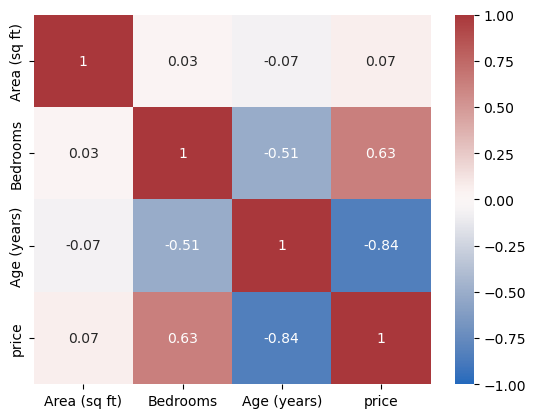

In [21]:
sns.heatmap(abc.corr().round(2), annot =True, vmin=-1, vmax=1, center=0, cmap='vlag')

In [22]:
df_ind= abc.drop(columns=['price'])

In [23]:
df_ind

,Area (sq ft),Bedrooms,Age (years)
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.5,18
3,3600,3.0,30
4,4000,5.0,8
...,...,...,...
94,13300,6.0,8
95,13400,5.0,8
96,13500,4.0,10
97,13600,3.0,5


In [24]:
price = df.price

In [25]:
price

0      550000.0
1      565000.0
2      610000.0
3      595000.0
4      760000.0
        ...    
94     760000.0
95     810000.0
96     850000.0
97     900000.0
98    1000000.0
Name: price, Length: 99, dtype: float64

In [26]:
reg = linear_model.LinearRegression()

In [27]:
reg.fit(df_ind,df.price)

LinearRegression()

In [28]:
x = df_ind.iloc[:,:3]
y = price

In [29]:
x

,Area (sq ft),Bedrooms,Age (years)
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.5,18
3,3600,3.0,30
4,4000,5.0,8
...,...,...,...
94,13300,6.0,8
95,13400,5.0,8
96,13500,4.0,10
97,13600,3.0,5


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [31]:
x_train

,Area (sq ft),Bedrooms,Age (years)
43,8200,4.0,30
62,10100,5.0,18
3,3600,3.0,30
71,11000,3.0,15
45,8400,5.0,8
...,...,...,...
95,13400,5.0,8
67,10600,3.0,5
64,10300,6.0,8
47,8600,3.0,5


In [32]:
reg = LinearRegression()

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

In [35]:
error = y_test - y_pred_test

In [36]:
error

26     73888.753653
86     56377.538220
2     -34407.363299
55    -54256.057346
75    -60093.129157
92    -85151.036866
16     76807.289559
73    164978.841557
54   -147664.539962
94   -159338.683584
53    170815.913368
91    -96429.591860
78    -22611.188133
13    182490.056989
7      -3926.312408
30    -47375.057379
22    -64721.285528
24   -138908.932246
33    176652.985179
8      -2181.436795
Name: price, dtype: float64

In [37]:
reg.predict([[3000, 3, 40]])

D:\DSAI\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([182485.22448184])

In [38]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

MSE =  11659223399.661917
R2 =  0.42964893558177586
RMSE =  107977.88384508152


In [39]:
matrix = abc.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

In [40]:
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [ ]:
sns.heatmap(matrix, annot =True, vmin=-1, vmax=1, center=0, cmap='vlag')

<Axes: >

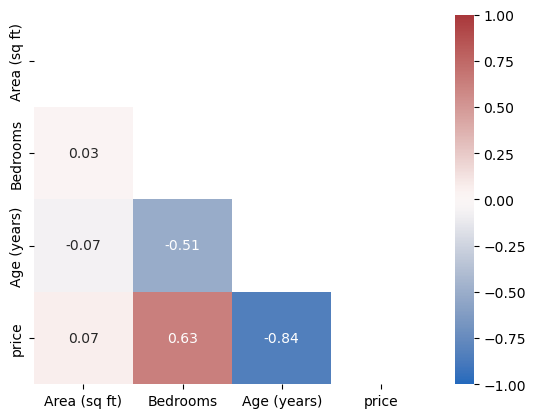

In [41]:
sns.heatmap(abc.corr().round(2), annot =True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask)